In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
import time
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from nltk.tokenize import word_tokenize
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
dt = pd.read_csv('Emotion_final.csv')
dt

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
# functions for divide dataset on test, train and val...
# I don't use they
def divide_blocks_train(length):
    y = dt.Text[:length * 7 // 10]
    return y

def divide_blocks_test(length):
    y = dt.Text[length * 7 // 10 + 1: -length * 5 // 100]
    return y

def divide_blocks_val(length):
    y = dt.Text[-length * 5 // 100:]
    return y



length = len(dt['Text'])
text = list(dt['Text'])
emotion = list(dt['Emotion'])

In [4]:
def token(x):
    # turns an array of sentences into a tuple of words
    x_new = []
    for i in range(len(x)):
        a = x[i].split()
        for j in range(len(a)):
            x_new.append(a[j])
    return x_new

In [5]:
def create_tuple(features):
    # returns a ready-made tuple for train and other
    m = []
    vocab = set(token(features))
    vocab_size = len(vocab)
    word_to_ix = {word:ix for ix, word in enumerate(vocab)}
    for i in range(length):
        m.append((text[i].split(), emotion[i]))
    return m, vocab_size, word_to_ix

In [6]:
# embadding sentenses
def make_context_vector(context, word_to_ix):
    # word_to_ix - a dictionary wich has keys=words in the sentenses
    idxs = [word_to_ix[w] for w in context] # до сих пор не понял как это работает
    return torch.tensor(idxs, dtype=torch.long)

In [7]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        # out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        # out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)
        
    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out
    
    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

In [8]:
#function of training
def learning(features, target):
    train = []
    loss = []
    acc_list = []
    num_epochs = 100
    EMDEDDING_DIM = 30
         
    tuple, vocab_size, word_to_ix = create_tuple(features)
    model = CBOW(vocab_size, EMDEDDING_DIM)
    loss_function = nn.NLLLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    #TRAINING
    for epoch in range(num_epochs):
        total_loss = 0
        for context, target in tuple:
                context_vector = make_context_vector(context, word_to_ix)
        log_probs = model(context_vector)
        labels = torch.tensor([word_to_ix[target]])
        total_loss += loss_function(log_probs, labels)
        #optimize at the end of each epoch
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        loss.append(total_loss.item())
        # calculate accuracy
        total = labels.size(0)
        _, predicted = torch.max(log_probs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                      .format(epoch + 1, num_epochs, total_loss.item(),
                              (correct / total) * 100))
    plt.plot(loss)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(acc_list)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoches')
    plt.show()
    
    print('Accuracu=',acc_list)
    print('Losses',loss)

Epoch [1/100], Loss: 8.8829, Accuracy: 0.00%
Epoch [2/100], Loss: 8.7765, Accuracy: 0.00%
Epoch [3/100], Loss: 8.6697, Accuracy: 0.00%
Epoch [4/100], Loss: 8.5624, Accuracy: 0.00%
Epoch [5/100], Loss: 8.4545, Accuracy: 0.00%
Epoch [6/100], Loss: 8.3459, Accuracy: 0.00%
Epoch [7/100], Loss: 8.2367, Accuracy: 0.00%
Epoch [8/100], Loss: 8.1268, Accuracy: 100.00%
Epoch [9/100], Loss: 8.0161, Accuracy: 100.00%
Epoch [10/100], Loss: 7.9045, Accuracy: 100.00%
Epoch [11/100], Loss: 7.7921, Accuracy: 100.00%
Epoch [12/100], Loss: 7.6787, Accuracy: 100.00%
Epoch [13/100], Loss: 7.5643, Accuracy: 100.00%
Epoch [14/100], Loss: 7.4488, Accuracy: 100.00%
Epoch [15/100], Loss: 7.3323, Accuracy: 100.00%
Epoch [16/100], Loss: 7.2145, Accuracy: 100.00%
Epoch [17/100], Loss: 7.0956, Accuracy: 100.00%
Epoch [18/100], Loss: 6.9754, Accuracy: 100.00%
Epoch [19/100], Loss: 6.8538, Accuracy: 100.00%
Epoch [20/100], Loss: 6.7308, Accuracy: 100.00%
Epoch [21/100], Loss: 6.6067, Accuracy: 100.00%
Epoch [22/100],

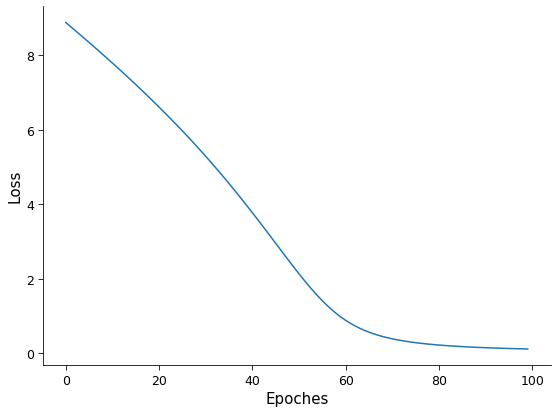

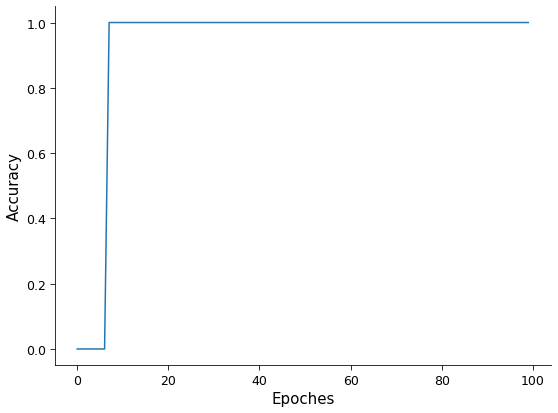

Accuracu= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Losses [8.882891654968262, 8.776532173156738, 8.669709205627441, 8.562369346618652, 8.454461097717285, 8.345931053161621, 8.236724853515625, 8.126790046691895, 8.016073226928711, 7.904519557952881, 7.7920732498168945, 7.678682327270508, 7.5642900466918945, 7.448840618133545, 7.332278728485107, 7.214549541473389, 7.095595359802246, 6.975360870361328, 6.85378885269165, 6.73082160949707, 6.606651306152344, 6.481637477874756, 6.35552453994751, 6.227806091308594, 6.098416805267334, 5.96730

In [9]:
learning(text, emotion)

# Something additional information

In [10]:
#USELESS
import random
import torch

def set_seed(seed=None, seed_torch=True):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.

# inform the user if the notebook uses GPU or CPU.

def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

In [11]:
#USELESS
SEED = 2021
set_seed(seed=SEED)
DEVICE = set_device()

Random seed 2021 has been set.
GPU is not enabled in this notebook. 
If you want to enable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `GPU` from the dropdown menu


In [12]:
vocab = set(token(text))
vocab_size = len(vocab)
word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [13]:
word_to_ix

{'shatter': 0,
 'joined': 1,
 'compatible': 2,
 'designers': 3,
 'dpt': 4,
 'easily': 5,
 'Cooper': 6,
 'repetition': 7,
 'weaved': 8,
 'tangibly': 9,
 'Norwich': 10,
 'flirtiness': 11,
 'secretary': 12,
 'fortunate': 13,
 'lava': 14,
 'BBC': 15,
 'breathi': 16,
 'downright': 17,
 'fantastic': 18,
 'indentured': 19,
 'depressive': 20,
 'restive': 21,
 'dealer': 22,
 'takeing': 23,
 'Horsley': 24,
 'Maurice': 25,
 'alternate': 26,
 'sodding': 27,
 'empathizing': 28,
 'sweaters': 29,
 'aout': 30,
 'neat': 31,
 'analyze': 32,
 'war': 33,
 'registered': 34,
 'physician': 35,
 'miner': 36,
 'um': 37,
 'translatethis': 38,
 'clinic': 39,
 'cardio': 40,
 'exci': 41,
 'reception': 42,
 'portrayals': 43,
 'grocers': 44,
 'fragile': 45,
 'edmonton': 46,
 '3.5': 47,
 'proclaim': 48,
 'lost': 49,
 'fluttering': 50,
 'knowledgeable': 51,
 'chairman': 52,
 'haulers': 53,
 'Greens': 54,
 'weighins': 55,
 'heroes': 56,
 'treat': 57,
 'infuriated': 58,
 'silk': 59,
 'pistil': 60,
 'diminished': 61,
 't

In [14]:
m = []
for i in range(length):
    m.append((text[i].split(), emotion[i]))

In [15]:
m[:4]

[(['i', 'didnt', 'feel', 'humiliated'], 'sadness'),
 (['i',
   'can',
   'go',
   'from',
   'feeling',
   'so',
   'hopeless',
   'to',
   'so',
   'damned',
   'hopeful',
   'just',
   'from',
   'being',
   'around',
   'someone',
   'who',
   'cares',
   'and',
   'is',
   'awake'],
  'sadness'),
 (['im',
   'grabbing',
   'a',
   'minute',
   'to',
   'post',
   'i',
   'feel',
   'greedy',
   'wrong'],
  'anger'),
 (['i',
   'am',
   'ever',
   'feeling',
   'nostalgic',
   'about',
   'the',
   'fireplace',
   'i',
   'will',
   'know',
   'that',
   'it',
   'is',
   'still',
   'on',
   'the',
   'property'],
  'love')]